# Calibrating the velocity field against observations 

In [95]:
# Copyright (C) 2024 Richard Stiskalek
# This program is free software; you can redistribute it and/or modify it
# under the terms of the GNU General Public License as published by the
# Free Software Foundation; either version 3 of the License, or (at your
# option) any later version.
#
# This program is distributed in the hope that it will be useful, but
# WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU General
# Public License for more details.
#
# You should have received a copy of the GNU General Public License along
# with this program; if not, write to the Free Software Foundation, Inc.,
# 51 Franklin Street, Fifth Floor, Boston, MA  02110-1301, USA.
import numpy as np
import matplotlib.pyplot as plt

import csiborgtools

from flow_bulk import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Enclosed overdensity

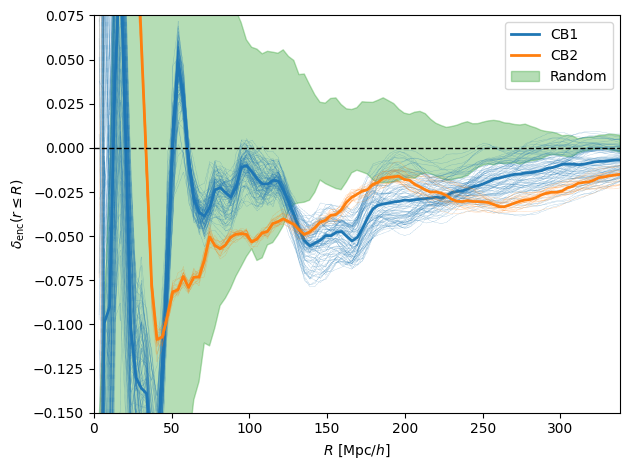

In [136]:
plt.figure()
cols = plt.rcParamsDefault['axes.prop_cycle'].by_key()['color']

r, overdensity = read_enclosed_density("csiborg1")
c = cols[0]
for i in range(len(overdensity)):
    plt.plot(r, overdensity[i], c=c, lw=0.25, zorder=0, ls="dotted")
plt.plot(r, np.median(overdensity, axis=0), c=c, lw=2, label="CB1")


r, overdensity = read_enclosed_density("csiborg2_main")
c = cols[1]
for i in range(len(overdensity)):
    plt.plot(r, overdensity[i], c=c, lw=0.25, ls="dotted")
plt.plot(r, np.median(overdensity, axis=0), c=c, lw=2, label="CB2")


r, overdensity = read_enclosed_density("csiborg2_random")
c = cols[2]
ymin = np.percentile(overdensity, 16, axis=0)
ymed = np.median(overdensity, axis=0)
ymax = np.percentile(overdensity, 84, axis=0)
plt.fill_between(r, ymin, ymax, color=c, alpha=0.35, label="Random", zorder=-1)

plt.xlabel(r"$R ~ [\mathrm{Mpc} / h]$")
plt.ylabel(r"$\delta_{\rm enc} (r \leq R)$")
plt.legend()

plt.xlim(0, r.max())
plt.ylim(-0.15, 0.075)
plt.axhline(0, c='k', ls='--', lw=1)
plt.tight_layout()
plt.savefig("../plots/enclosed_density.png", dpi=450)
plt.show()

## Enclosed bulk flow

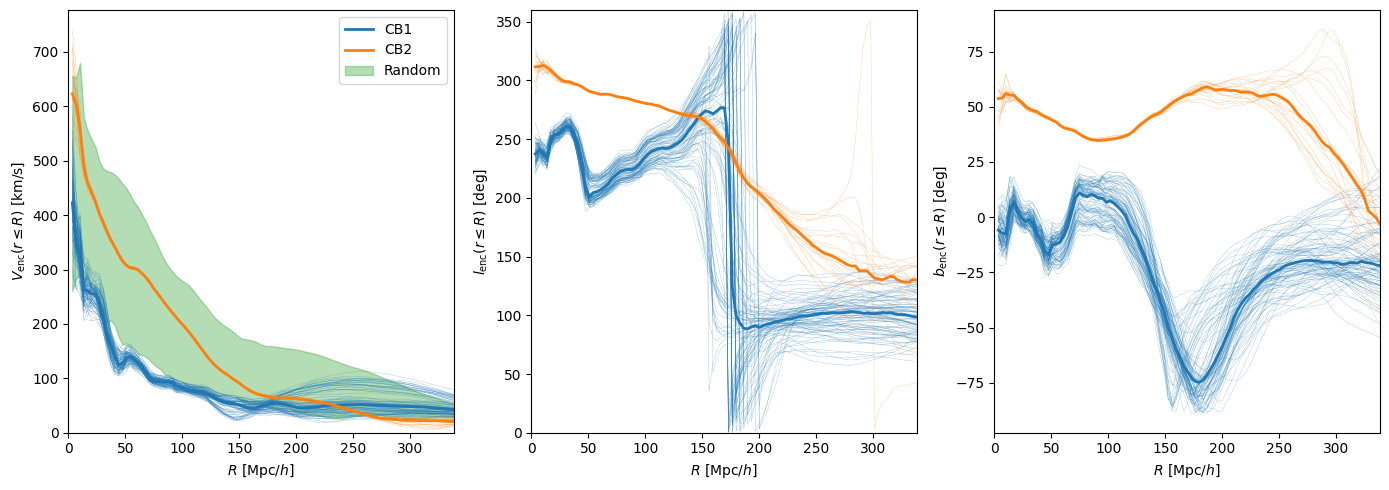

In [141]:
fig, axs = plt.subplots(1, 3, figsize=(14, 5))
cols = plt.rcParamsDefault['axes.prop_cycle'].by_key()['color']
thin_line_kwargs = {"lw": 0.3, "zorder": 0, "ls": "dotted"}

# CSiBORG1
r, Vmag, l, b = read_enclosed_flow("csiborg1")
c = cols[0]
for i in range(len(Vmag)):
    axs[0].plot(r, Vmag[i], c=c, **thin_line_kwargs)
    axs[1].plot(r, l[i], c=c, **thin_line_kwargs)
    axs[2].plot(r, b[i], c=c, **thin_line_kwargs)

axs[0].plot(r, np.median(Vmag, axis=0), c=c, lw=2, label="CB1")
axs[1].plot(r, np.median(l, axis=0), c=c, lw=2)
axs[2].plot(r, np.median(b, axis=0), c=c, lw=2)

# CSiBORG2
r, Vmag, l, b = read_enclosed_flow("csiborg2_main")
c = cols[1]
for i in range(len(Vmag)):
    axs[0].plot(r, Vmag[i], c=c, **thin_line_kwargs)
    axs[1].plot(r, l[i], c=c, **thin_line_kwargs)
    axs[2].plot(r, b[i], c=c, **thin_line_kwargs)

axs[0].plot(r, np.median(Vmag, axis=0), c=c, lw=2, label="CB2")
axs[1].plot(r, np.median(l, axis=0), c=c, lw=2)
axs[2].plot(r, np.median(b, axis=0), c=c, lw=2)

# Random
r, Vmag, l, b = read_enclosed_flow("csiborg2_random")
c = cols[2]
ymin = np.percentile(Vmag, 16, axis=0)
ymax = np.percentile(Vmag, 84, axis=0)
ymed = np.median(Vmag, axis=0)
axs[0].fill_between(r, ymin, ymax, color=c, alpha=0.35, zorder=-1,
                    label="Random")


axs[0].legend()
for i in range(3):
    axs[i].set_xlabel(r"$R ~ [\mathrm{Mpc} / h]$")
    axs[i].set_xlim(0, r.max())

axs[0].set_ylim(0)
axs[0].set_ylabel(r"$V_{\rm enc} (r \leq R) ~ [\mathrm{km} / \mathrm{s}]$")
axs[1].set_ylabel(r"$l_{\rm enc} (r \leq R) ~ [\mathrm{deg}]$")
axs[2].set_ylabel(r"$b_{\rm enc} (r \leq R) ~ [\mathrm{deg}]$")
axs[1].set_ylim(0, 360)

fig.tight_layout()
fig.savefig("../plots/enclosed_flow.png", dpi=450)
fig.show()